In [ ]:
import numpy as np
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import librosa
from librosa import display
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob 
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from keras.layers import Conv1D, MaxPooling1D, Dropout
from tensorflow.keras.optimizers import *
from sklearn.metrics import confusion_matrix



In [ ]:
#Loading the data and splitting it into training and test
path_ = 'gdrive/My Drive/DT2119 Speech Speaker Recognition/Project/'
data_actor_all = np.load(path_+"Data_Actor_All_40.npy", allow_pickle=True)
mfccs, label_emotions, label_actors = zip(*data_actor_all)


X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state = 60)
Xtr, Xval, Ytr, Yval = train_test_split(Xtr, Ytr, test_size=0.20, shuffle = True, random_state = 60)


Xtr = np.expand_dims(Xtr, axis=2)
Xtst = np.expand_dims(Xtst, axis=2)
Xval = np.expand_dims(Xval, axis=2)



In [ ]:
print(X.shape)
print(Xtr.shape)
print(Ytr.shape)
print(Xval.shape)
print(Yval.shape)
print(Xtst.shape)
print(Ytst.shape)

(1440, 40)
(921, 40, 1)
(921,)
(231, 40, 1)
(231,)
(288, 40, 1)
(288,)


In [ ]:
model = models.Sequential()
model.add(layers.Conv1D(128, 8,padding='same',
                 input_shape=(Xtr.shape[1],1)))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Conv1D(256, 8,padding='same',))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling1D(pool_size=(5)))
model.add(layers.Flatten())
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dense(256))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(8))
model.add(layers.Activation('softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 40, 128)           1152      
_________________________________________________________________
activation (Activation)      (None, 40, 128)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 8, 128)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 8, 256)            262400    
_________________________________________________________________
activation_1 (Activation)    (None, 8, 256)            0         
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 256)            0         
_________________________________________________________________
flatten (Flatten)            (None, 256)               0

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=RMSprop(lr=0.00003), metrics=['accuracy'])
cnnhistory=model.fit(Xtr, Ytr, batch_size=16, epochs=700, validation_data=(Xval, Yval)) 

Epoch 1/700
58/58 [==============================] - 1s 25ms/step - loss: 5.5476 - accuracy: 0.1227 - val_loss: 2.1624 - val_accuracy: 0.1515
Epoch 2/700
58/58 [==============================] - 1s 24ms/step - loss: 3.4753 - accuracy: 0.1412 - val_loss: 2.2557 - val_accuracy: 0.1472
Epoch 3/700
58/58 [==============================] - 1s 22ms/step - loss: 2.5933 - accuracy: 0.1716 - val_loss: 2.1384 - val_accuracy: 0.1212
Epoch 4/700
58/58 [==============================] - 1s 21ms/step - loss: 2.2542 - accuracy: 0.1933 - val_loss: 1.9463 - val_accuracy: 0.2554
Epoch 5/700
58/58 [==============================] - 1s 22ms/step - loss: 2.1191 - accuracy: 0.2020 - val_loss: 2.0576 - val_accuracy: 0.1905
Epoch 6/700
58/58 [==============================] - 1s 22ms/step - loss: 2.0346 - accuracy: 0.2193 - val_loss: 1.9235 - val_accuracy: 0.2424
Epoch 7/700
58/58 [==============================] - 1s 21ms/step - loss: 2.0149 - accuracy: 0.2193 - val_loss: 2.0114 - val_accuracy: 0.1299
Epoch 

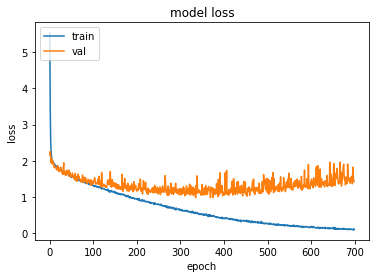

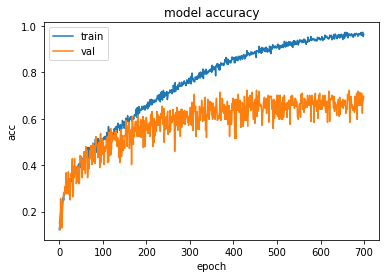

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()


plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Text(0, 0.5, 'Loss Value')

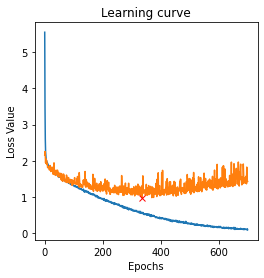

In [ ]:
plt.figure(figsize=(4, 4))
plt.title("Learning curve")
plt.plot(cnnhistory.history["loss"], label="loss")
plt.plot(cnnhistory.history["val_loss"], label="val_loss")
plt.plot( np.argmin(cnnhistory.history["val_loss"]),
          np.min(cnnhistory.history["val_loss"]),
          marker="x", color="r", label="best model")

plt.xlabel("Epochs")
plt.ylabel("Loss Value")

In [ ]:
test_loss, test_acc = model.evaluate(Xtst, Ytst, verbose=2)

9/9 - 0s - loss: 1.5803 - accuracy: 0.6493


In [ ]:
predictions = model.predict_classes(Xtst)
arrayyy=confusion_matrix(Ytst, predictions)



Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


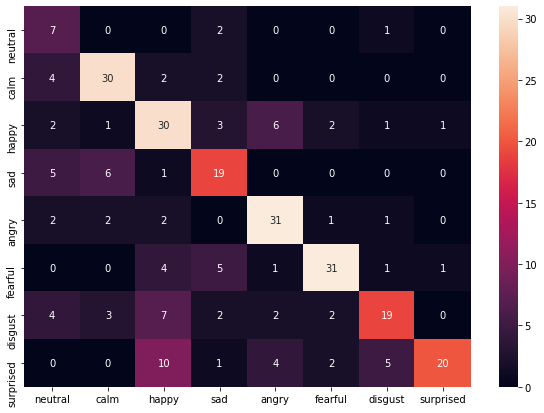

In [ ]:
# Plot non-normalized confusion matrix
import seaborn as sn


from sklearn.metrics import plot_confusion_matrix

class_names = ['neutral', 'calm', 'happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']

#disp = plot_confusion_matrix(arrayyy, Xtst, Ytst, display_labels=class_names)
                              
#disp.ax_.set_title(title)

#print(title)
#print(disp.confusion_matrix)

#plt.show()


df_cm = pd.DataFrame(arrayyy, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

In [ ]:
#Implement SVM

X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
#Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True)
Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True, random_state = 60)


from sklearn.svm import SVC
from sklearn import metrics

clf = SVC(kernel='linear')
clf.fit(Xtr, Ytr) 

X = Xtr
y = Ytr

preds = clf.predict(Xtst)

metrics.accuracy_score(Ytst, preds)

0.5277777777777778

In [ ]:
#try with kernel rbf

clf = SVC(kernel='rbf')
clf.fit(Xtr, Ytr) 

X = Xtr
y = Ytr

preds = clf.predict(Xtst)

metrics.accuracy_score(Ytst, preds)


0.2673611111111111

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

X = np.asarray(mfccs)
Y = np.asarray(label_emotions)
#Xtr, Xtst, Ytr, Ytst = train_test_split(X, Y, test_size=0.20, shuffle = True)
acc = []

for i in range(1,30,1):
  clf = RandomForestClassifier(criterion='gini', max_depth=i, random_state=42)
  clf.fit(Xtr, Ytr)
  preds = clf.predict(Xtst)
  print('acc with max depth as '+str(i)+': '+str(metrics.accuracy_score(Ytst, preds)))
  acc.append(metrics.accuracy_score(Ytst, preds))

acc with max depth as 1: 0.2604166666666667
acc with max depth as 2: 0.3229166666666667
acc with max depth as 3: 0.3506944444444444
acc with max depth as 4: 0.4375
acc with max depth as 5: 0.4722222222222222
acc with max depth as 6: 0.5104166666666666
acc with max depth as 7: 0.5625
acc with max depth as 8: 0.5555555555555556
acc with max depth as 9: 0.59375
acc with max depth as 10: 0.6076388888888888
acc with max depth as 11: 0.5868055555555556
acc with max depth as 12: 0.6180555555555556
acc with max depth as 13: 0.6111111111111112
acc with max depth as 14: 0.6180555555555556
acc with max depth as 15: 0.6041666666666666
acc with max depth as 16: 0.6006944444444444
acc with max depth as 17: 0.625
acc with max depth as 18: 0.6076388888888888
acc with max depth as 19: 0.6354166666666666
acc with max depth as 20: 0.6076388888888888
acc with max depth as 21: 0.6180555555555556
acc with max depth as 22: 0.59375
acc with max depth as 23: 0.6076388888888888
acc with max depth as 24: 0.60069

Text(0, 0.5, 'accuracy')

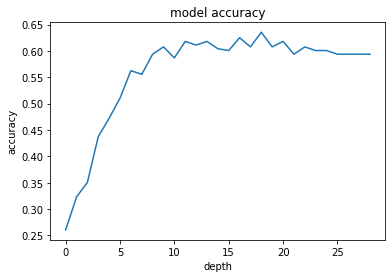

In [ ]:
plt.plot(acc)
plt.title('model accuracy')
plt.xlabel('depth')
plt.ylabel('accuracy')